In [1]:
#libraries to use for this exercise (please fun this cell first):
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.io
import matplotlib.cm as cm

In [2]:
#Load the .mat data using scipy.io, which will be a dictionary datatype.
data_dict = scipy.io.loadmat('ex3/ex3data1.mat')
X=data_dict['X']
y=data_dict['y']
X=np.matrix(X)
y=np.matrix(y)

AxesImage(54,36;334.8x217.44)


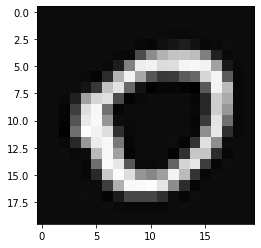

In [3]:
#plt.imsave('filename.png', np.array(X[2000:2100,:]).reshape(200,200), cmap=cm.gray)
print (plt.imshow(np.array(X[130,:]).reshape(20,20),cmap=cm.gray))

In [4]:
#define a regularized cost function
#define sigmoid function that trannsforms the data into a range of 0-1.
def sigmoid(z):
    g = np.zeros(np.shape(z));
    g = 1/(1+np.exp(-z));
    return g
#define a regularized cost function
#Note: X and y are matrix and theta is a array data type.
def lrCostFunction(theta, X, y, lambd):
    m = len(y)
    z = np.transpose(np.dot(X,theta))
    h = sigmoid(z)
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m + np.matrix(theta[1:])*np.transpose(np.matrix(theta[1:]))*lambd/(2*m)
    grad = np.zeros(np.size(theta))
    g =np.dot(X.T,(h-y))/m
    grad[0] = g[0]
    gs=np.dot(X.T,(h-y))/m+np.matrix(theta*lambd/m).T
    grad[1:] = gs[1:].flatten()
    return J, grad

In [5]:
#test the cost function with a set of test data and test theta (Expected cost: 2.534819)
#theta_t = np.array([-2, -1, 1, 2])
#X_column1 = np.ones((5,1), dtype=int)
#X = []
#for i in range (1,16):
#    X.append([i/10])
#X_t = np.c_[X_column1, np.matrix(X).reshape(3,5).T]
#print (X_t)
#y_t = np.matrix(np.transpose([[1,0,1,0,1]]))
#print (y_t)
#lambd_t = 3
#print (np.shape(X_t))
#print (np.shape(y_t))
#print (np.shape(theta_t))
#print (type(X_t))
#print (type(y_t))
#print (type(theta_t))
#[J, grad] = lrCostFunction(theta_t, X_t, y_t, lambd_t)
#print (J, grad)

In [6]:
#STOP

In [7]:
#Define a one vs all function for multi class issues
def oneVsAll(X, y, num_labels, lambd):
    [m, n] = np.shape(X)
    all_theta = []
    #Note: the X is without bias in the input, so add the bias first
    additional_coulmn = np.ones((m,1))
    X = np.append(additional_coulmn,X,axis=1)
    for i in range (1,num_labels+1):
        y_bool = []
        for j in y:
            if j==[i]:
                value=1
            else:
                value=0
            y_bool.append([value])
        y_bool = np.matrix(y_bool)
        #Set Initial theta
        initial_theta = np.zeros((n + 1, 1))
        result = opt.fmin_tnc(func=lrCostFunction, x0=np.array(initial_theta), args=(X, y_bool, lambd))
        all_theta.append(result[0])
    return np.array(all_theta)

In [9]:
#Define a predict function to find the accuracy
def predictOneVsAll(all_theta, X):
    [m, n] = np.shape(X)
    additional_coulmn = np.ones((m,1))
    X = np.append(additional_coulmn,X,axis=1)
    predict = X*all_theta.T
    predict = sigmoid(predict)
    outputall = []
    for i in range(0,m):
        list = np.array(predict[i])[0]
        a = np.where(list == max(list))
        b = int(a[0])
        b = b+1
        if b==10:
            b=0
        outputall.append(b)
    result = np.matrix(outputall).T
    return result

In [10]:
#give some estimate argument and store the output in 'result'
num_labels = 10
lambd =0.1
result = oneVsAll(X, y, num_labels, lambd)

In [11]:
#print (np.shape(result))
#print (np.shape(y))
#print (np.shape(X))
#print (type(y))
#print (type(X))
#print (type(result))
#print (np.shape(result.T))

In [16]:
predict = predictOneVsAll(result, X)
#print (predict)
#print (type(predictOneVsAll(result, X)))

<class 'numpy.matrix'>


In [24]:
#define a funnction to find the accuracy of the logistic algorithm with an input of a matrix 'predict'
def accuracy(predict):
    count = 0
    m=np.shape(predict)[0]
    for i in range(0,m):
        if predict[i]==y[i]:
            count += 1
    accracy = count/m
    print (accracy)

In [26]:
accuracy(predict)

0.8648


In [27]:
#STOP

In [28]:
#Load the weights
weights = scipy.io.loadmat('ex3/ex3weights.mat')
Theta1=weights['Theta1']
Theta2=weights['Theta2']
print (type(Theta1))

<class 'numpy.ndarray'>


In [29]:
#define a predict function for multi layers
def predict(Theta1, Theta2, X):
    [m, n] = np.shape(X)
    additional_coulmn = np.ones((m,1))
    X = np.append(additional_coulmn,X,axis=1)
    Layer2 = X*Theta1.T
    Layer2 = sigmoid(Layer2)
    additional_coulmn = np.ones((m,1))
    Layer2 = np.append(additional_coulmn,Layer2,axis=1)
    Layer3 = Layer2*Theta2.T
    predict = sigmoid(Layer3)
    outputall = []
    for i in range(0,m):
        list = np.array(predict[i])[0]
        a = np.where(list == max(list))
        b = int(a[0])
        b = b+1
        if b==10:
            b=0
        outputall.append(b)
    result = np.matrix(outputall).T
    return result

In [30]:
#calculate the result accordinng to the given theta(s)
multi = predict(Theta1, Theta2, X)

In [31]:
#calculate the accuracy of the multi-layer network
accuracy(multi)

0.876
